In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("churn_telecom_scoring.csv")

### Charges mensuelles moyennes

In [5]:
charges_moyennes = df['MonthlyCharges'].mean()

In [9]:
print(f"La charge moyenne est de {round(charges_moyennes,2)}€ par clients")

La charge moyenne est de 64.76€ par clients


### Taux d'attrition

In [11]:
nb_resiliation = df["Churn"].value_counts().iloc[1]
taux_attrition = (nb_resiliation/df.shape[0])

In [14]:
print(f"Le taux d'attrition est de {round(taux_attrition,3)*100}%")

Le taux d'attrition est de 31.5%


### Répartition de la reconduite d'un abonnement

In [15]:
valeurs = df["Churn"].value_counts()
label = df["Churn"].unique()

Text(0.5, 1.0, "Répartition de la reconduite d'un abonnement")

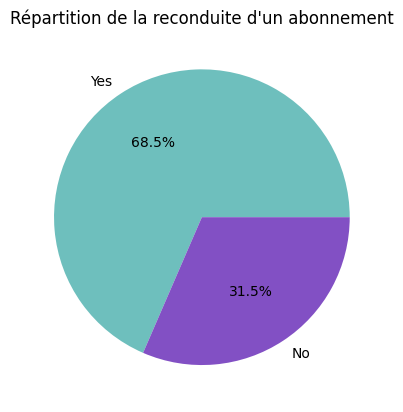

In [22]:
fig, ax = plt.subplots()
ax.pie(valeurs, labels=label,
       colors=['#6EBFBD', '#8250C4'],
       autopct='%1.1f%%')
plt.title("Répartition de la reconduite d'un abonnement")

### Ancienneté (Tenure)

In [42]:
y = pd.DataFrame(df["Score_résiliation"].groupby(df["tenure"]).mean())

<Axes: xlabel='tenure', ylabel='Score_résiliation'>

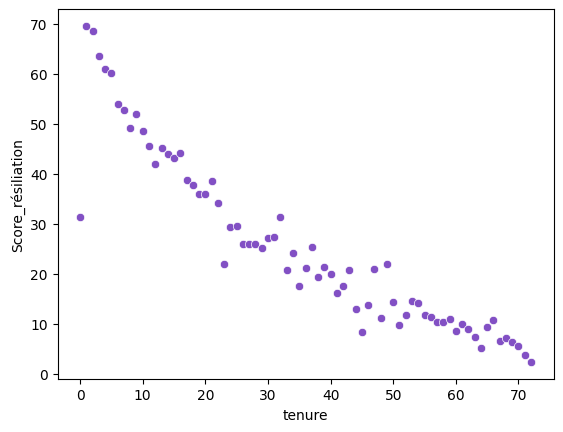

In [46]:
sns.scatterplot(data = y, x="tenure", y="Score_résiliation", color = "#8250C4" )

## Nombre de résiliation de contrat

In [ ]:
df_churn_yes = df.loc[df["Churn"]=="Yes"]

### En fonction des charges mensuelles

Pour cela, j'ai ovulu créer 3 groupes: Charges faibles, charges modérée et charges élevées. Pour déterminer les valeurs de ces catégories voici le grpahique que j'ai utilisé:

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

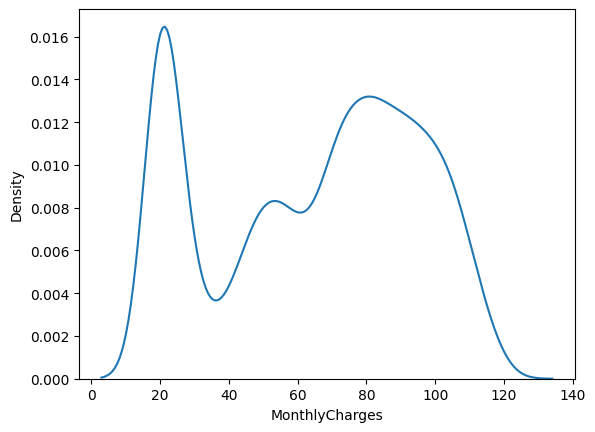

In [48]:
sns.kdeplot(df['MonthlyCharges'])

Ici, la courbe met en avant les 3 groupes:
1. Entre 0 et 40 
2. Entre 40 et 70
3. 70 et + 

Ainsi, je vais créer une nouvelle colonne:

In [49]:
def groupes_charges(monthly_charge):
    if monthly_charge <= 40:
        return "Faible"
    elif 40 < monthly_charge < 70:
        return "Modéré"
    else:
        return "Elevé"

In [50]:
df["groupMonthlyCharges"] = df["MonthlyCharges"].apply(groupes_charges)

Je peux maintenant faire le graphique:

Text(0.5, 1.0, 'Nombre de contrats résiliés en fonction des charges mensuelles')

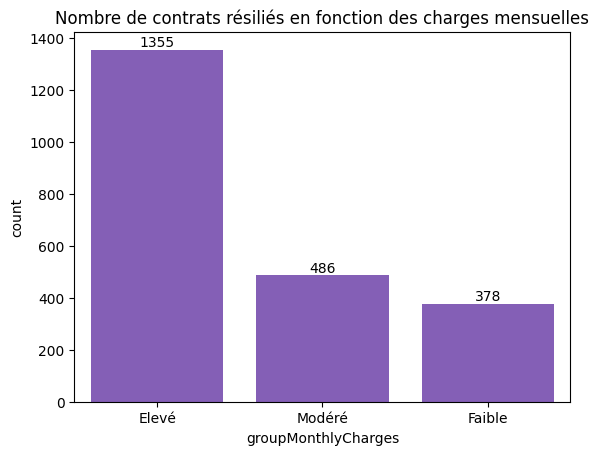

In [ ]:
df_plot = df_churn_yes["groupMonthlyCharges"].value_counts().reset_index()

fig, ax = plt.subplots()
ax = sns.barplot(data = df_plot, x = "groupMonthlyCharges", y="count", color = "#8250C4")
ax.bar_label(ax.containers[0]) #Pour afficher les labels
plt.title("Nombre de contrats résiliés en fonction des charges mensuelles")

### En foncdtion du servicee internet

Text(0.5, 1.0, 'Nombre de contrats résiliés en fonction du service internet')

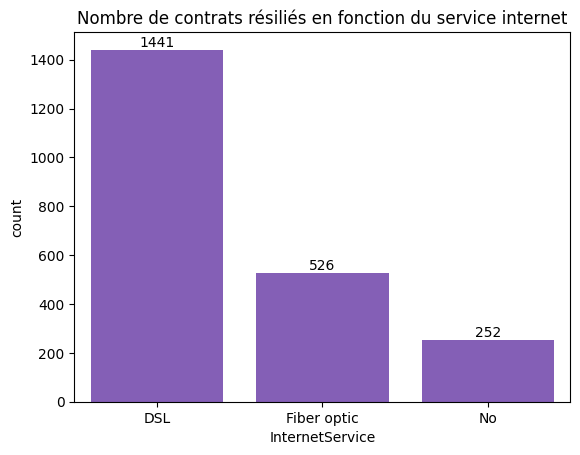

In [87]:
df_plot_internet = df_churn_yes["InternetService"].value_counts().reset_index()
fig, ax = plt.subplots()
ax = sns.barplot(data = df_plot_internet, x = "InternetService", y="count", color = "#8250C4")
ax.bar_label(ax.containers[0]) #Pour afficher les labels
plt.title("Nombre de contrats résiliés en fonction du service internet")

### En fonction de la fréquence de renouvellement du contrat

Text(0.5, 1.0, 'Nombre de contrats résiliés en fonction de la durée du contract')

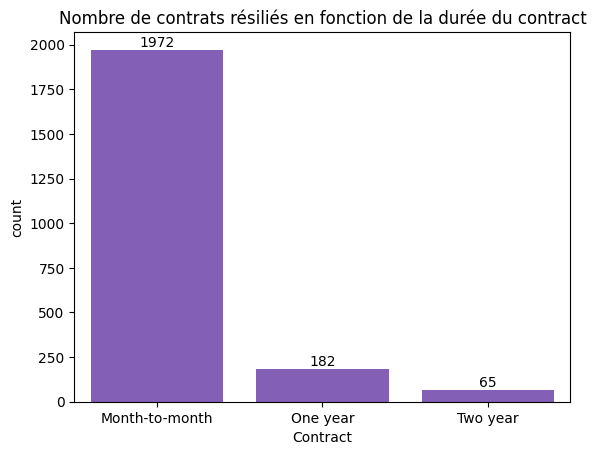

In [89]:
df_plot_contrat = df_churn_yes["Contract"].value_counts().reset_index()
fig, ax = plt.subplots()
ax = sns.barplot(data = df_plot_contrat, x = "Contract", y="count", color = "#8250C4")
ax.bar_label(ax.containers[0]) #Pour afficher les labels
plt.title("Nombre de contrats résiliés en fonction de la durée du contract")

## Clients à appeler

In [90]:
df.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'Score_résiliation', 'groupMonthlyCharges'],
      dtype='object')

In [130]:
table = df[["customerID", "Score_résiliation", "tenure", "TotalCharges"]].loc[(df["Score_résiliation"]>=90) & (df['Churn']=='No')].sort_values(by=["Score_résiliation"], ascending = False)

In [131]:
table

,customerID,Score_résiliation,tenure,TotalCharges
211,4195-NZGTA,97.53,1,25.25
3753,1816-FLZDK,95.19,1,29.15
4400,5215-LNLDJ,94.88,7,149.05
5387,8676-OOQEJ,94.86,4,118.40
4024,1329-VHWNP,94.25,7,189.95
3961,7421-ZLUPA,94.08,8,226.95
5716,8903-XEBGX,93.70,2,108.65
6739,6994-KERXL,93.65,4,238.50
2171,3995-WFCSM,93.65,2,111.40
5489,0804-XBFBV,93.58,11,321.05


# Avec PowerBI

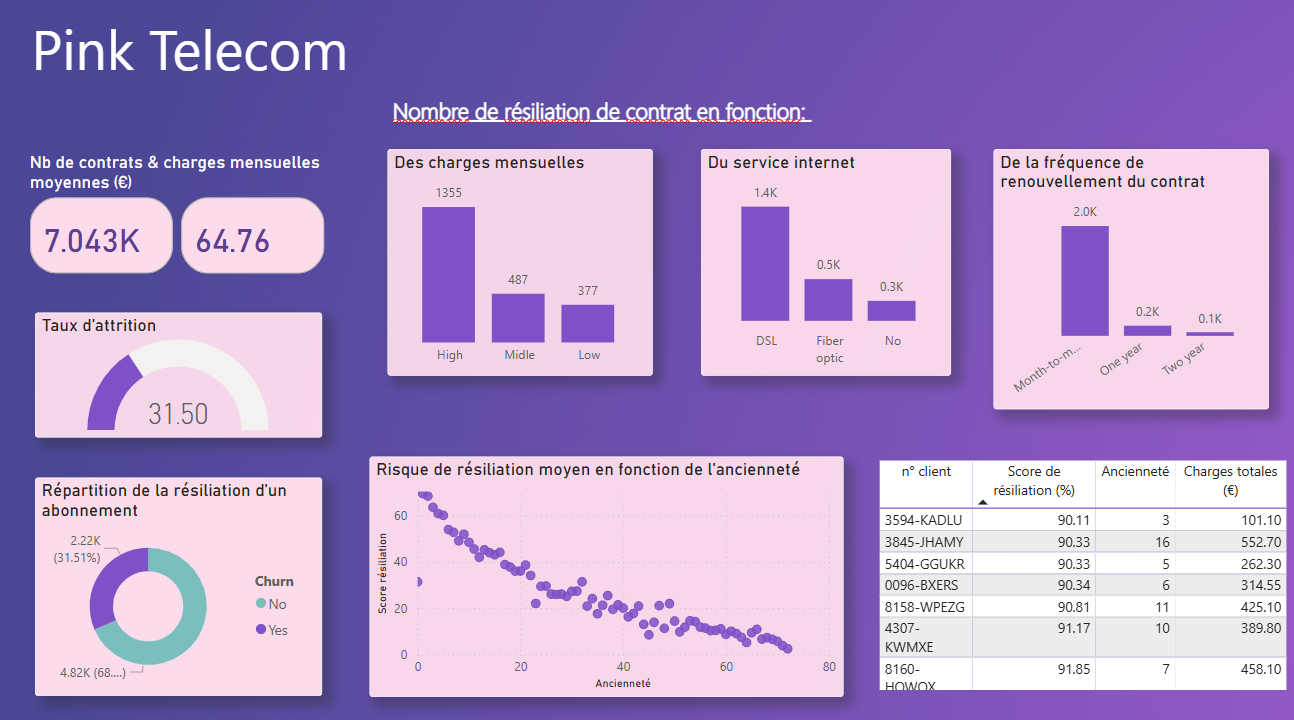